In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df1 = df
print(df1.shape)
print(df1.isnull().sum())

(50, 5)
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [7]:
df2 = df1.select_dtypes(include='number')
df2.shape

(50, 4)

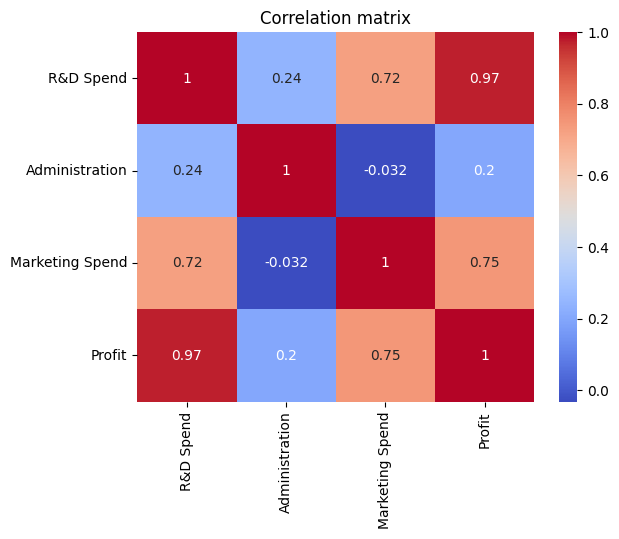

In [9]:
import seaborn as sns

corr_matrix = df2.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [19]:
df2.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


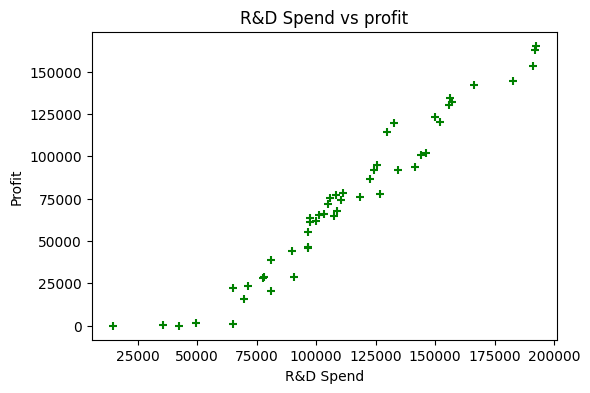

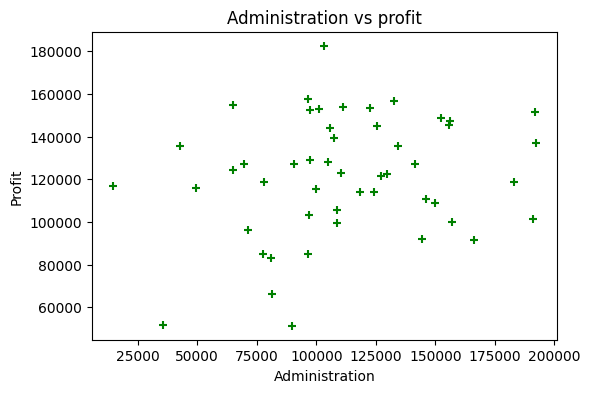

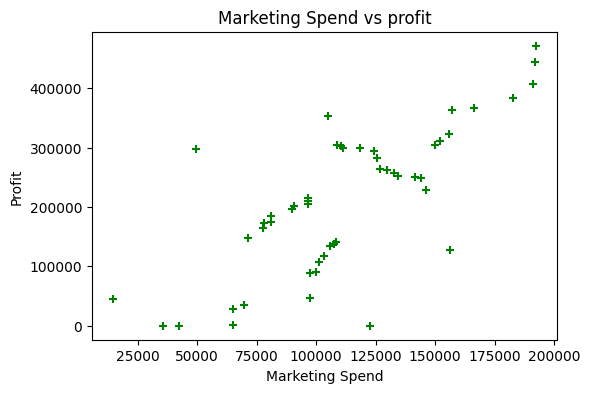

In [22]:
def scatter_plot(dataframe):
    columns = dataframe.columns
    x = dataframe['Profit']
    for column in columns:
        if column != 'Profit':
            y = dataframe[column]
            plt.figure(figsize=(6,4))
            plt.scatter(x,y,color='g',marker='+')
            plt.xlabel(column)
            plt.ylabel('Profit')
            plt.title(f'{column} vs profit')
    plt.show()
scatter_plot(df2)

#### Administration column is not linear it won't be helpful in predicting the profit(I guess)

In [24]:
df3 = df2.drop(['Administration'],axis=1)
print(df3.shape)
print(df3.head())

(50, 3)
   R&D Spend  Marketing Spend     Profit
0  165349.20        471784.10  192261.83
1  162597.70        443898.53  191792.06
2  153441.51        407934.54  191050.39
3  144372.41        383199.62  182901.99
4  142107.34        366168.42  166187.94


In [28]:
X = df3[['R&D Spend','Marketing Spend']]
y = df3['Profit']
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)



(50, 2)
(50,)


In [30]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (40, 2)
X_test:  (10, 2)
y_train:  (40,)
y_test:  (10,)


In [33]:
lin_reg = LinearRegression()
regr = lin_reg.fit(X_train,y_train)
y_pred=regr.predict(X_test)
print(y_pred)


[102284.64605183 133873.92383812 134182.1495165   73701.1069363
 180642.25299736 114717.24903894  68335.07575312  97433.45922275
 114580.92136452 170343.31979498]


In [36]:
print('Intercept: ',regr.intercept_)
print('Coefficient: ',regr.coef_)

Intercept:  46346.338761236555
Coefficient:  [0.7886183  0.03257663]


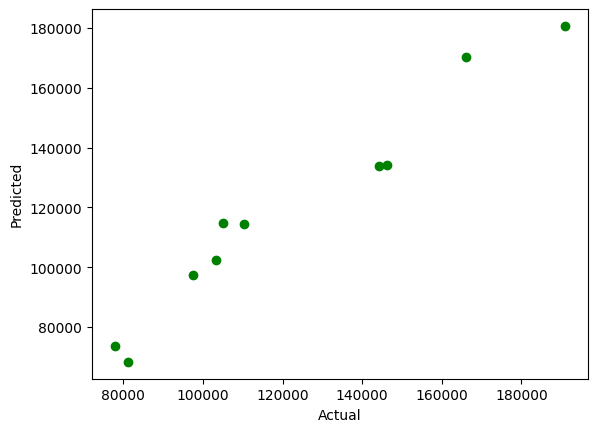

In [44]:
plt.scatter(y_test,y_pred,color='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

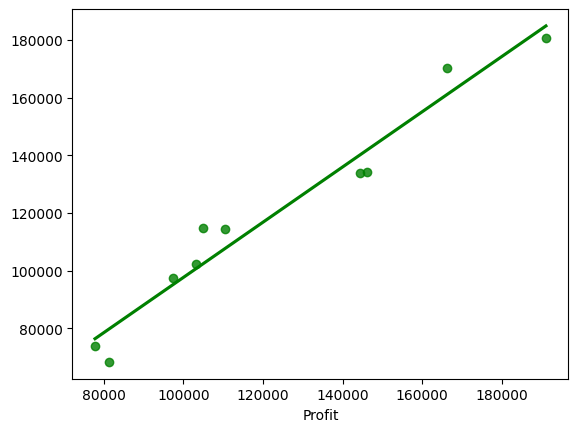

In [40]:
sns.regplot(x=y_test,y=y_pred,color='g',ci=None)
plt.show()

In [43]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print('Accuracy: ',(r2_score(y_test,y_pred))*100)
print('Mean Absolute error: ',mean_absolute_error(y_test,y_pred))
print('Mean Squared error: ',mse)
print('RMSE: ',np.sqrt(mse))


Accuracy:  94.74386447268488
Mean Absolute error:  6886.5945882465185
Mean Squared error:  67220275.37568131
RMSE:  8198.797190788495
